# Table of Contents
   1. Business Statement   
      1.1 About Data Set
   2. Introduction 
   3. Installing Libraries 
   4. Reading Data Set
   5. Machine Learning Models 
   6. Summary

# 1. Business Statement 

## 1.1 Bank Customer Churn
Dataset Shape: 10000 rows x 14 columns

1. RowNumber: I'd variable
2. CustomerId: Id vairable
3. Surname: Surname of the customer
4. CreditScore: Credit Score of the customer
5. Geography: Place from where the person belongs
6. Gender: Gender of the person
7. Age: Age of the person
8. Tenure: Time period of credit card issuing 
9. Balance: Balance in the account
10. NumOfProducts: Number of products brought
11. HasCrCard: Does the person own a credit card
12. IsActiveMember: Is the person Active
13. EstimatedSalary: Estimated Salary of the person
14. Exited: Target Variable





Columns Types:
1. Continuous: 11
 
2. Categorical: 3

# Importing Important Dependencies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import warnings
import gc
warnings.filterwarnings("ignore")

# Reading Data Set

In [2]:
df = pd.read_csv('sensor.csv')

In [3]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
df.shape

(220320, 55)

In [5]:
df.isnull().values.any()

True

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [7]:
sum(df.duplicated())

0

In [23]:
df.drop(columns = 'timestamp',  inplace = True)

In [24]:
df.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,...,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,110159.500000,2.376127,47.592519,50.867460,43.752522,590.677555,73.396602,13.504617,15.851177,15.207538,...,35.453419,43.879479,42.656614,43.094632,48.018197,44.340682,150.887467,57.119422,186.830350,202.325309
std,63601.049991,0.402954,3.293978,3.666669,2.418786,144.018229,17.297513,2.140146,2.174339,2.014125,...,10.258893,11.043732,11.575670,12.836773,15.640364,10.441816,82.240040,19.142488,52.882704,105.702400
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.443750,46.310760,50.390620,42.838539,626.620400,69.977213,13.346350,15.914350,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,182.581000,180.555600
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.911770,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,204.571800,214.699100
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [25]:
df.isnull().sum()

Unnamed: 0             0
sensor_00              0
sensor_01              0
sensor_02              0
sensor_03              0
sensor_04              0
sensor_05              0
sensor_06              0
sensor_07              0
sensor_08              0
sensor_09              0
sensor_10              0
sensor_11              0
sensor_12              0
sensor_13              0
sensor_14              0
sensor_15         220320
sensor_16              0
sensor_17              0
sensor_18              0
sensor_19              0
sensor_20              0
sensor_21              0
sensor_22              0
sensor_23              0
sensor_24              0
sensor_25              0
sensor_26              0
sensor_27              0
sensor_28              0
sensor_29              0
sensor_30              0
sensor_31              0
sensor_32              0
sensor_33              0
sensor_34              0
sensor_35              0
sensor_36              0
sensor_37              0
sensor_38              0


In [26]:
df.isnull().sum()/df.shape[0]*100

Unnamed: 0          0.0
sensor_00           0.0
sensor_01           0.0
sensor_02           0.0
sensor_03           0.0
sensor_04           0.0
sensor_05           0.0
sensor_06           0.0
sensor_07           0.0
sensor_08           0.0
sensor_09           0.0
sensor_10           0.0
sensor_11           0.0
sensor_12           0.0
sensor_13           0.0
sensor_14           0.0
sensor_15         100.0
sensor_16           0.0
sensor_17           0.0
sensor_18           0.0
sensor_19           0.0
sensor_20           0.0
sensor_21           0.0
sensor_22           0.0
sensor_23           0.0
sensor_24           0.0
sensor_25           0.0
sensor_26           0.0
sensor_27           0.0
sensor_28           0.0
sensor_29           0.0
sensor_30           0.0
sensor_31           0.0
sensor_32           0.0
sensor_33           0.0
sensor_34           0.0
sensor_35           0.0
sensor_36           0.0
sensor_37           0.0
sensor_38           0.0
sensor_39           0.0
sensor_40       

In [27]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

Unnamed: 0         0
sensor_00          0
sensor_01          0
sensor_02          0
sensor_03          0
sensor_04          0
sensor_05          0
sensor_06          0
sensor_07          0
sensor_08          0
sensor_09          0
sensor_10          0
sensor_11          0
sensor_12          0
sensor_13          0
sensor_14          0
sensor_15     220320
sensor_16          0
sensor_17          0
sensor_18          0
sensor_19          0
sensor_20          0
sensor_21          0
sensor_22          0
sensor_23          0
sensor_24          0
sensor_25          0
sensor_26          0
sensor_27          0
sensor_28          0
sensor_29          0
sensor_30          0
sensor_31          0
sensor_32          0
sensor_33          0
sensor_34          0
sensor_35          0
sensor_36          0
sensor_37          0
sensor_38          0
sensor_39          0
sensor_40          0
sensor_41          0
sensor_42          0
sensor_43          0
sensor_44          0
sensor_45          0
sensor_46    

In [28]:
df.select_dtypes(include=('object')).isna().sum()
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isna().sum()

machine_status    0
dtype: int64

In [29]:
df.isnull().sum()

Unnamed: 0             0
sensor_00              0
sensor_01              0
sensor_02              0
sensor_03              0
sensor_04              0
sensor_05              0
sensor_06              0
sensor_07              0
sensor_08              0
sensor_09              0
sensor_10              0
sensor_11              0
sensor_12              0
sensor_13              0
sensor_14              0
sensor_15         220320
sensor_16              0
sensor_17              0
sensor_18              0
sensor_19              0
sensor_20              0
sensor_21              0
sensor_22              0
sensor_23              0
sensor_24              0
sensor_25              0
sensor_26              0
sensor_27              0
sensor_28              0
sensor_29              0
sensor_30              0
sensor_31              0
sensor_32              0
sensor_33              0
sensor_34              0
sensor_35              0
sensor_36              0
sensor_37              0
sensor_38              0


In [43]:
df.drop(columns = 'sensor_15',  inplace = True)

In [44]:
X = df.drop('machine_status', axis=1)
y = df['machine_status']

In [45]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = .3, random_state = 2022)

In [46]:
# Break X_train in to 2 parts: X_train_cat, X_train_cont, same w/ X_test
X_train_cat = X_train.select_dtypes(exclude='number')
X_train_cat

""
176299
31719
37626
155023
140065
...
177841
103024
147629
1244


In [47]:
X_test_cat = X_test.select_dtypes(exclude='number')
X_test_cat

""
2537
168862
130862
105410
218003
...
103142
1650
170925
56347


In [48]:
X_train_cont = X_train.select_dtypes(include='number')
X_train_cont

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
176299,176299,2.455556,49.088539,51.519096,44.487846,635.879639,74.08689,14.36632,16.65220,15.14757,...,35.416660,40.625000,42.245370,39.062500,50.63657,43.113430,311.05330,67.708340,193.8657,192.9977
31719,31719,2.405382,49.739580,54.644100,45.659721,646.759300,84.66326,13.50550,16.16753,15.65393,...,36.458330,50.781250,39.641200,38.773150,39.64120,42.245370,146.41200,52.083330,234.9537,195.0231
37626,37626,2.440799,45.789930,51.953120,43.446178,633.796300,85.01647,13.34635,16.13136,15.14757,...,30.208330,35.416664,38.194440,41.956020,41.95602,38.194443,205.72920,56.712960,230.0347,206.5972
155023,155023,1.518981,50.564240,49.479160,42.925350,448.165527,70.40844,13.79485,16.16030,15.73351,...,33.072910,41.406250,43.402780,59.895830,50.63657,59.895830,177.66200,55.266205,193.8657,247.6852
140065,140065,2.396528,43.359380,50.173611,42.404510,646.643600,83.12273,14.57610,16.12413,15.98669,...,36.458330,41.406250,54.687500,41.087960,50.63657,58.159720,137.15280,47.743057,216.1458,172.1644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177841,177841,2.486053,47.960068,51.736110,46.657986,635.185181,68.80727,14.57610,16.65220,15.65393,...,35.416660,49.218750,37.905090,40.219910,50.63657,43.692131,201.38890,51.793980,193.8657,175.3472
103024,103024,2.450637,49.913190,52.473960,44.053818,627.893600,71.50571,13.31742,15.58160,14.91609,...,38.020832,40.625000,37.905090,38.194443,49.76852,42.534720,80.72916,50.347220,177.9514,205.4398
147629,147629,2.497859,46.267360,49.652770,45.876736,638.078700,80.24606,13.31742,16.16030,15.29224,...,36.718750,54.427080,40.509258,38.773150,40.50926,41.087960,210.93750,53.530090,193.8657,173.9005
1244,1244,2.440799,46.527770,52.170140,44.444443,650.000000,79.61161,13.02807,16.16753,15.73351,...,31.250000,40.364580,41.956020,46.585650,39.35185,37.615742,192.99770,81.597220,240.1620,217.0139


In [49]:
X_test_cont = X_test.select_dtypes(include='number')
X_test_cont

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
2537,2537,2.340451,50.217010,52.777770,44.357640,632.523100,81.647110,13.14381,16.12413,15.41522,...,32.552080,39.062500,45.428240,64.814810,44.560180,39.351850,193.865700,81.018520,230.324100,198.20600
168862,168862,2.500810,53.993050,50.303820,44.965275,638.541626,74.052500,14.09867,16.65220,16.12413,...,34.375000,42.708330,41.087960,36.458332,45.428242,54.108800,169.270800,46.006940,193.865700,92.88194
130862,130862,2.456539,38.802080,39.973957,36.718750,3.029514,99.999878,13.64294,16.16753,15.49479,...,27.343748,29.687498,30.381945,30.960648,30.960648,31.828703,30.671297,31.539352,32.118057,197.33800
105410,105410,2.441782,48.480900,51.605900,43.359380,644.444500,84.517390,14.03356,16.12413,15.61777,...,36.458330,41.666660,38.194443,37.905090,41.087960,41.666670,72.337960,46.875000,196.759300,187.21060
218003,218003,2.434896,50.998260,51.258680,45.789928,635.763900,65.557820,15.11863,16.60880,15.69734,...,34.114582,45.312500,43.981480,40.509260,50.636570,60.763890,284.143500,62.210650,193.865700,229.74540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103142,103142,2.451620,47.916664,51.432290,41.840270,645.949100,78.624850,13.26678,15.63223,15.22714,...,34.375000,39.062500,42.245370,39.351850,42.245370,45.428240,115.451400,48.032410,213.252300,172.16440
1650,1650,2.458507,47.178820,52.170140,43.836800,639.699100,71.670600,13.02807,16.06626,15.89265,...,29.947916,38.020830,53.240740,42.534720,37.905090,35.879631,196.759300,93.750000,216.724500,230.03470
170925,170925,2.503762,49.088540,52.256940,47.265630,644.907400,65.263880,14.60503,17.66493,17.15856,...,38.802080,44.531250,54.687500,38.773150,44.849540,96.643520,190.972200,82.175930,193.865700,225.98380
56347,56347,2.455556,47.612850,52.690970,46.093750,632.407400,63.850320,13.09317,16.24711,14.87992,...,35.677082,40.885410,37.905094,39.351850,42.534720,40.509258,199.652800,68.287030,277.488400,220.19680


In [50]:
gc.collect()

12

In [51]:
from sklearn.preprocessing import OneHotEncoder

# Encoding on X_train_cat and X_test_cat
ohe = OneHotEncoder(drop = 'first')

X_train_cat_encoded = pd.DataFrame(ohe.fit_transform(X_train_cat).toarray(), columns = ohe.get_feature_names(list(X_train_cat.columns)))
X_test_cat_encoded = pd.DataFrame(ohe.transform(X_test_cat).toarray(), columns = ohe.get_feature_names(list(X_test_cat.columns)))

In [52]:
from sklearn.preprocessing import StandardScaler

# Scaling on X_train_cont and X_test_cont
sc = StandardScaler()

X_train_cont_scaled = pd.DataFrame(sc.fit_transform(X_train_cont), columns = X_train_cont.columns)
X_test_cont_scaled = pd.DataFrame(sc.transform(X_test_cont), columns = X_test_cont.columns)

In [53]:
X_train = pd.concat([X_train_cat_encoded, X_train_cont_scaled], axis = 1)
X_test = pd.concat([X_test_cat_encoded, X_test_cont_scaled], axis = 1)

In [54]:
colors= ["YlGnBu", "Blues", "BuPu", "Greens", "PiYG"]
rnd.choice(colors)

'BuPu'

# Machine Learning Models:

1. Logistic Regression
2. Decision Tree
3. Gaussian Naive Bayes
4. Random Forest
5. K-Nearest Neighbors
6. Support Vector Machine
7. Stochastic Gradient Descent
8. AdaBoost
9. Gradient Bossting 
# Metrics used: Accuracy Score, F-Beta Score, Classification Report, Confusion Matrix, ROCAUC Curve, Precision-Recall Curve

In [55]:
from sklearn import metrics
from sklearn.metrics import fbeta_score, accuracy_score
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ROCAUC, PrecisionRecallCurve

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

#Created an obj for logistic regression 
log_reg = LogisticRegression(random_state = 10)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [57]:
#Training Accuracy
log_reg.score(X_train, y_train)

0.9977889303869696

In [58]:
#Testing Accuracy
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test) 
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.9980785524086178
0.9977889303869696


In [59]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion.ravel()

array([    0,     0,     1,     0, 61730,    74,     0,    52,  4239],
      dtype=int64)

In [60]:
precision_positive = metrics.precision_score(y_test, y_test_pred, average='weighted')
precision_positive

0.9980691924503428

In [61]:
precision_positive = metrics.precision_score(y_train, y_train_pred, average='weighted')
precision_positive

0.9977531034927569

In [62]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, average='weighted')
recall_specificity

0.9980785524086178

In [63]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, average='weighted')
recall_specificity

0.9977889303869696

In [64]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.        , 0.99881962, 0.98352941])

In [65]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.        , 0.99898047, 0.98524114])

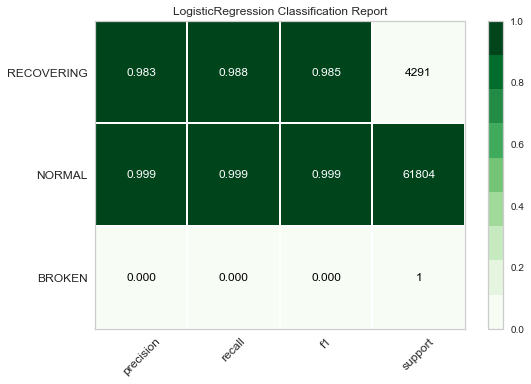

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [66]:
visualizer = ClassificationReport(log_reg, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

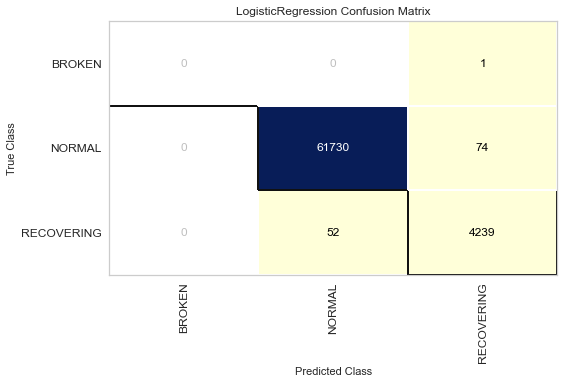

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [67]:
visualizer = ConfusionMatrix(log_reg, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

#Created an obj for Decision Tree 
dec_tree = DecisionTreeClassifier(max_depth = 25, min_samples_split = 5, random_state = 10)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, min_samples_split=5, random_state=10)

In [69]:
#Training Accuracy
dec_tree.score(X_train, y_train)

0.9999740636995539

In [70]:
#Testing Accuracy
y_train_pred = dec_tree.predict(X_train)
y_test_pred = dec_tree.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.9995612442507867
0.9999740636995539


In [71]:
precision_positive = metrics.precision_score(y_test, y_test_pred, average='weighted')
precision_positive

0.9995762430083696

In [72]:
precision_positive = metrics.precision_score(y_train, y_train_pred, average='weighted')
precision_positive

0.9999759162924429

In [73]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, average='weighted')
recall_specificity

0.9995612442507867

In [74]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, average='weighted')
recall_specificity

0.9999740636995539

In [75]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.76923077, 0.99998611, 0.99995091])

In [76]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.        , 0.99978966, 0.99661965])

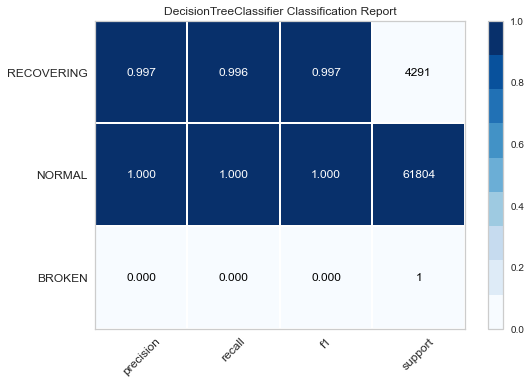

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [77]:
visualizer = ClassificationReport(dec_tree, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

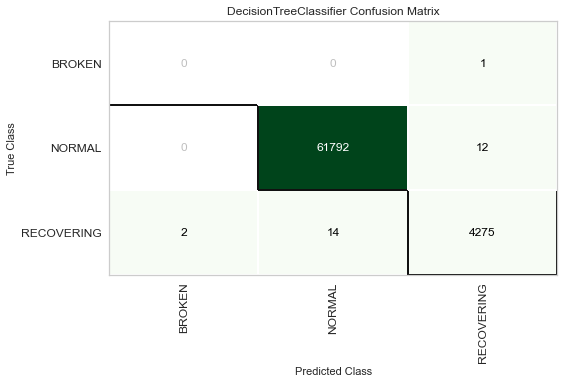

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [78]:
visualizer = ConfusionMatrix(dec_tree, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# Gaussian Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB

#Created an obj for Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [80]:
#Training Accuracy
gnb.score(X_train, y_train)

0.9696999170038386

In [81]:
#Testing Accuracy
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.9703461631566207
0.9696999170038386


In [82]:
precision_positive = metrics.precision_score(y_test, y_test_pred, average='weighted')
precision_positive

0.9932006535435556

In [83]:
precision_positive = metrics.precision_score(y_train, y_train_pred, average='weighted')
precision_positive

0.9931354380122999

In [84]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, average='weighted')
recall_specificity

0.9703461631566207

In [85]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, average='weighted')
recall_specificity

0.9696999170038386

In [86]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.00335289, 0.98469895, 0.93155912])

In [87]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.        , 0.98489039, 0.93319792])

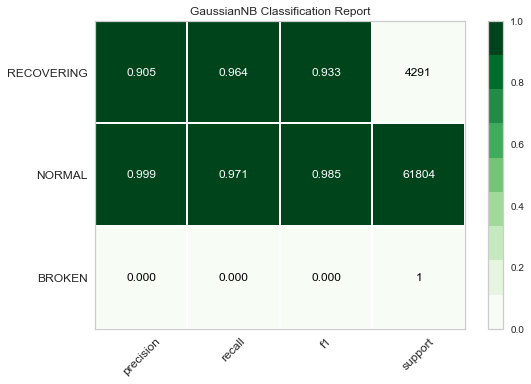

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [88]:
visualizer = ClassificationReport(gnb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

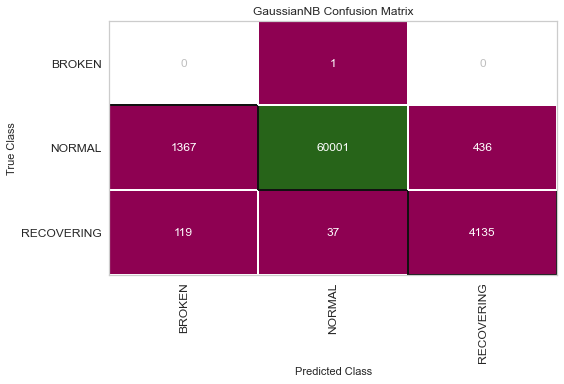

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [89]:
visualizer = ConfusionMatrix(gnb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

#Created an obj for Random Forest
rand_for = RandomForestClassifier(n_jobs = None, max_depth = 25, min_samples_split = 5, random_state = 10, n_estimators= 200)
rand_for.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=200,
                       random_state=10)

In [91]:
#Training Accuracy
rand_for.score(X_train, y_train)

0.999987031849777

In [92]:
#Testing Accuracy
y_train_pred = rand_for.predict(X_train)
y_test_pred = rand_for.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.9998487049140644
0.999987031849777


In [93]:
precision_positive = metrics.precision_score(y_test, y_test_pred, average='weighted')
precision_positive

0.9998486684389223

In [94]:
precision_positive = metrics.precision_score(y_train, y_train_pred, average='weighted')
precision_positive

0.9999870325313

In [95]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, average='weighted')
recall_specificity

0.9998487049140644

In [96]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, average='weighted')
recall_specificity

0.999987031849777

In [97]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.8       , 0.99999653, 0.99995092])

In [98]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.        , 0.99993528, 0.99883423])

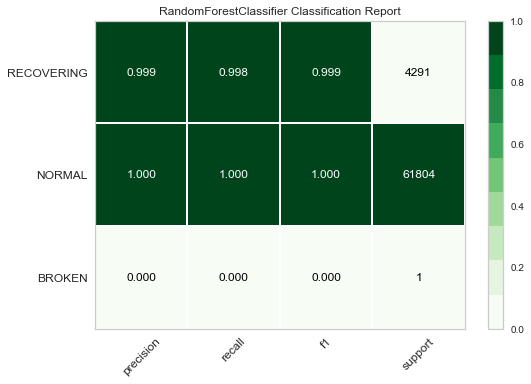

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [99]:
visualizer = ClassificationReport(rand_for, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

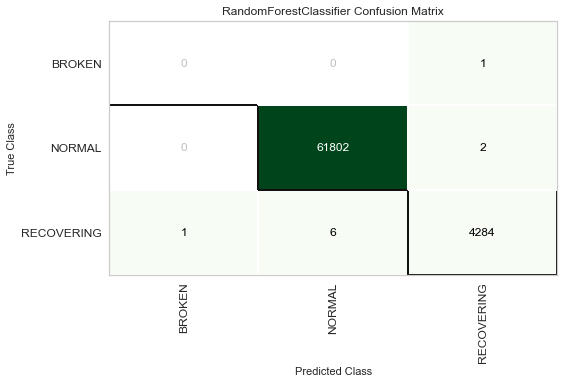

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [100]:
visualizer = ConfusionMatrix(rand_for, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# K-Nearest Neighbors

In [101]:
from sklearn.neighbors import KNeighborsClassifier

#Created an obj for K - Nearest Neighbors
knc = KNeighborsClassifier(n_jobs = -1, n_neighbors = 6)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [102]:
#Training Accuracy
knc.score(X_train, y_train)

0.9998573503475464

In [103]:
#Testing Accuracy
y_train_pred = knc.predict(X_train)
y_test_pred = knc.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.9997276688453159
0.9998573503475464


In [104]:
precision_positive = metrics.precision_score(y_test, y_test_pred, average='weighted')
precision_positive

0.9997125022079054

In [105]:
precision_positive = metrics.precision_score(y_train, y_train_pred, average='weighted')
precision_positive

0.9998184351138604

In [106]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, average='weighted')
recall_specificity

0.9997276688453159

In [107]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, average='weighted')
recall_specificity

0.9998573503475464

In [108]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.        , 0.9999271 , 0.99916515])

In [109]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.        , 0.99985439, 0.9980161 ])

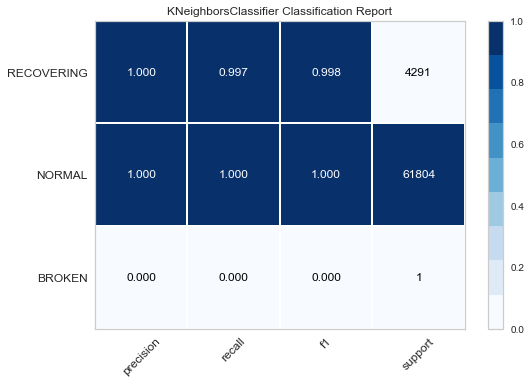

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [110]:
visualizer = ClassificationReport(knc, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

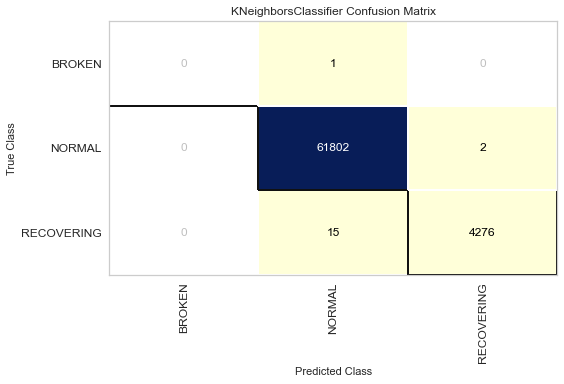

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [111]:
visualizer = ConfusionMatrix(knc, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

# Support Vector Machine

In [112]:
from sklearn.svm import SVC

#Created an obj for SVM
svm = SVC(C = 0.25, kernel = 'linear', random_state = 10)
svm.fit(X_train, y_train)

SVC(C=0.25, kernel='linear', random_state=10)

In [113]:
#Training Accuracy
svm.score(X_train, y_train)

0.9981196182176574

In [114]:
#Testing Accuracy
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.9982752360203341
0.9981196182176574


In [115]:
precision_positive = metrics.precision_score(y_test, y_test_pred, average='weighted')
precision_positive

0.998295059831406

In [116]:
precision_positive = metrics.precision_score(y_train, y_train_pred, average='weighted')
precision_positive

0.998181913088934

In [117]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, average='weighted')
recall_specificity

0.9982752360203341

In [118]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, average='weighted')
recall_specificity

0.9981196182176574

In [119]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.        , 0.99901046, 0.98657784])

In [120]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.        , 0.99909375, 0.98686505])

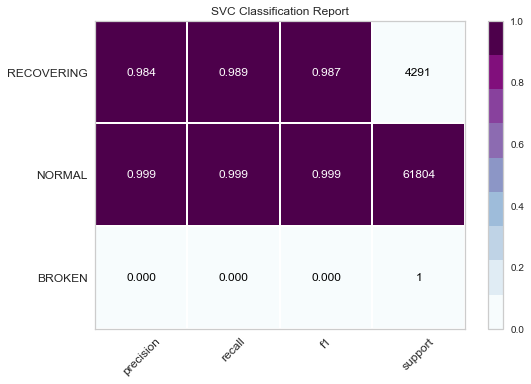

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [121]:
visualizer = ClassificationReport(svm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

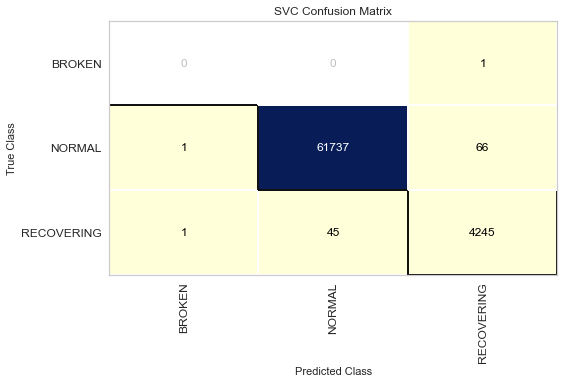

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [122]:
visualizer = ConfusionMatrix(svm, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Stochastic Gradient Descent

In [123]:
from sklearn.linear_model import SGDClassifier

#Created an obj for SGD
sgd = SGDClassifier(loss = 'modified_huber', max_iter = 2000, shuffle = False, n_jobs = None, early_stopping = False, random_state = 10)
sgd.fit(X_train, y_train)

SGDClassifier(loss='modified_huber', max_iter=2000, random_state=10,
              shuffle=False)

In [124]:
#Training Accuracy
sgd.score(X_train, y_train)

0.9952212366428053

In [125]:
#Testing Accuracy
y_train_pred = sgd.predict(X_train)
y_test_pred = sgd.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.9954308884047446
0.9952212366428053


In [126]:
precision_positive = metrics.precision_score(y_test, y_test_pred, average='weighted')
precision_positive

0.9954014441819785

In [127]:
precision_positive = metrics.precision_score(y_train, y_train_pred, average='weighted')
precision_positive

0.995156959066238

In [128]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, average='weighted')
recall_specificity

0.9954308884047446

In [129]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, average='weighted')
recall_specificity

0.9952212366428053

In [130]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([0.        , 0.99744295, 0.96384589])

In [131]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.        , 0.99755746, 0.9647912 ])

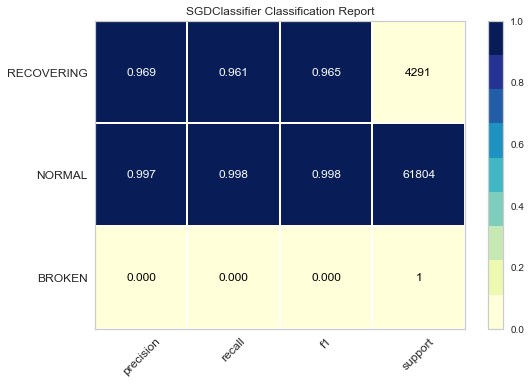

<AxesSubplot:title={'center':'SGDClassifier Classification Report'}>

In [132]:
visualizer = ClassificationReport(sgd, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

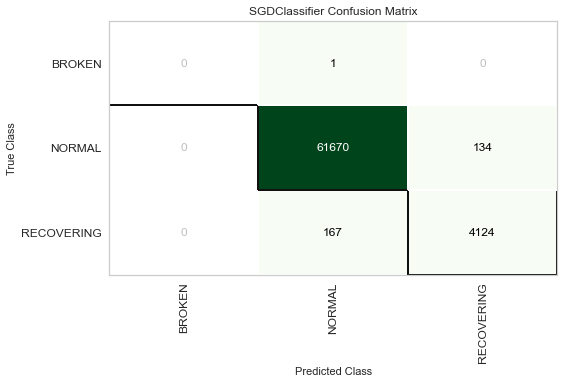

<AxesSubplot:title={'center':'SGDClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [133]:
visualizer = ConfusionMatrix(sgd, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Ada Boost

In [134]:
from sklearn.ensemble import AdaBoostClassifier

#Created an obj for Ada Boost
adab = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1 , random_state = 10)
adab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=10)

In [135]:
#Training Accuracy
adab.score(X_train, y_train)

0.9923228550679531

In [136]:
#Testing Accuracy
y_train_pred = adab.predict(X_train)
y_test_pred = adab.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

0.9922536916000968
0.9923228550679531


In [137]:
precision_positive = metrics.precision_score(y_test, y_test_pred, average='weighted')
precision_positive

0.9926038205067003

In [138]:
precision_positive = metrics.precision_score(y_train, y_train_pred, average='weighted')
precision_positive

0.9926932881484736

In [139]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, average='weighted')
recall_specificity

0.9922536916000968

In [140]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, average='weighted')
recall_specificity

0.9923228550679531

In [141]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

array([1.        , 0.99588008, 0.94375831])

In [142]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

array([0.        , 0.99585675, 0.94230552])

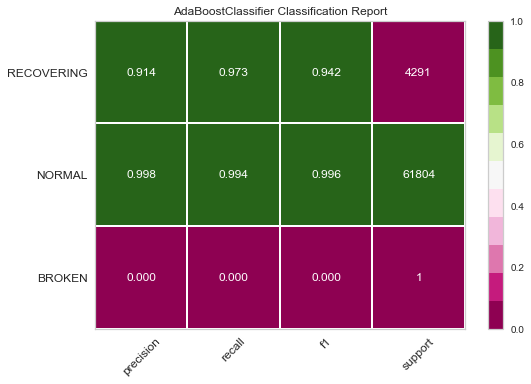

<AxesSubplot:title={'center':'AdaBoostClassifier Classification Report'}>

In [143]:
visualizer = ClassificationReport(adab, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

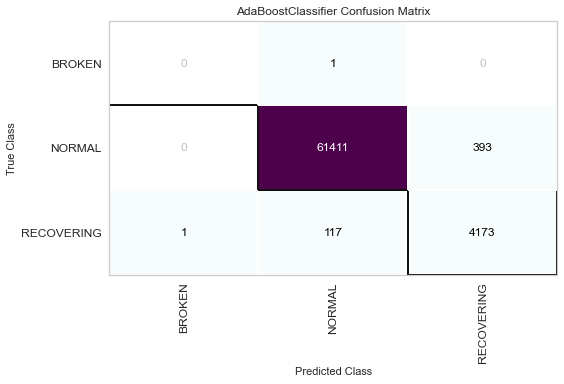

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [144]:
visualizer = ConfusionMatrix(adab, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()

# Gradient Boosting

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

#Created an obj for Gradient Boosting
gb = GradientBoostingClassifier( n_estimators = 200, learning_rate = 0.1 , random_state = 10)
gb.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
#Training Accuracy
gb.score(X_train, y_train)

In [ ]:
#Testing Accuracy
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_train, y_train_pred))

In [ ]:
precision_positive = metrics.precision_score(y_test, y_test_pred, average='weighted')
precision_positive

In [ ]:
precision_positive = metrics.precision_score(y_train, y_train_pred, average='weighted')
precision_positive

In [ ]:
recall_specificity = metrics.recall_score(y_test, y_test_pred, average='weighted')
recall_specificity

In [ ]:
recall_specificity = metrics.recall_score(y_train, y_train_pred, average='weighted')
recall_specificity

In [ ]:
fbeta_score(y_train, y_train_pred, beta = 1, average = None)

In [ ]:
fbeta_score(y_test, y_test_pred, beta = 1, average = None)

In [ ]:
visualizer = ClassificationReport(gb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 

In [ ]:
visualizer = ConfusionMatrix(gb, support = True, color_bar = True, cmap = rnd.choice(colors))
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show()